In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression

calender = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

In [138]:
calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [139]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [140]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [141]:
listings=listings.rename(columns={"id" : "listing_id"})

In [142]:
df = pd.merge(reviews, listings, on = 'listing_id')

In [143]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month

In [144]:
df.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments',
       'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommod

In [145]:
df.drop(['reviewer_id', 'reviewer_name', 'comments',
       'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood','smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact',  'calendar_last_scraped', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'license', 'jurisdiction_names', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification','availability_30', 'availability_60',
       'availability_90', 'availability_365','calendar_updated','zipcode' ,'weekly_price',
       'monthly_price'],axis = 1,inplace=True)
       


In [146]:
df.columns

Index(['listing_id', 'id', 'date', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'market',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'calculated_host_listings_count', 'reviews_per_month', 'month'],
      dtype='object')

In [147]:
np.sum(df.isnull() == True)

listing_id                            0
id                                    0
date                                  0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
city                                  0
state                                 0
market                                0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                           609
bedrooms                            290
beds                                  0
bed_type                              0
amenities                             0
square_feet                       80597
price                                 0
security_deposit                  42733
cleaning_fee                      23539
guests_included                       0
extra_people                          0
minimum_nights                        0
maximum_nights                        0
has_availability                      0


In [148]:
df['price']= df['price'].str.replace('$','')
df['price']= df['price'].str.replace(',','')
df['price']= pd.to_numeric(df['price'])


<ipython-input-148-67ae57d22c58>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['price']= df['price'].str.replace('$','')


## Investigating Price distribution:

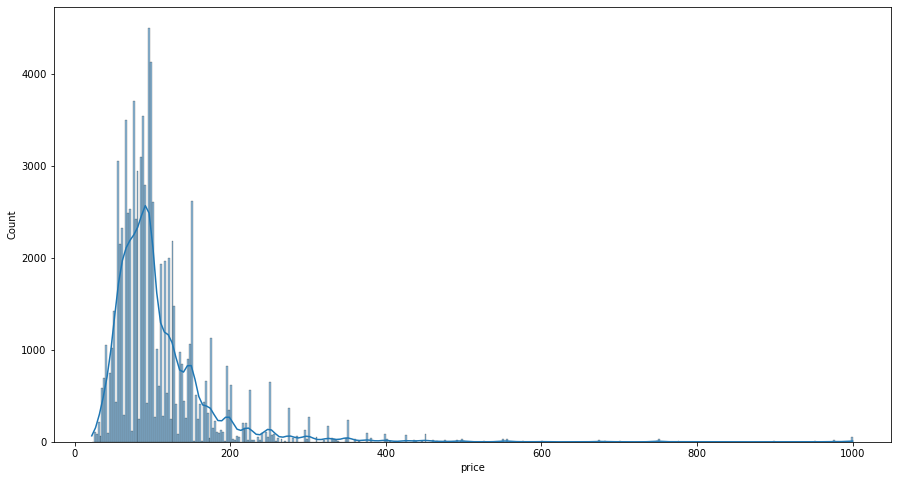

In [149]:
plt.figure(figsize = (15,8))
sns.histplot(df.price,kde=True);


> ## from the plot we conclude the price distribution is right skewed ranging between 0 to 200 with mean almost 100 

# which neighbourhood has the most visits?

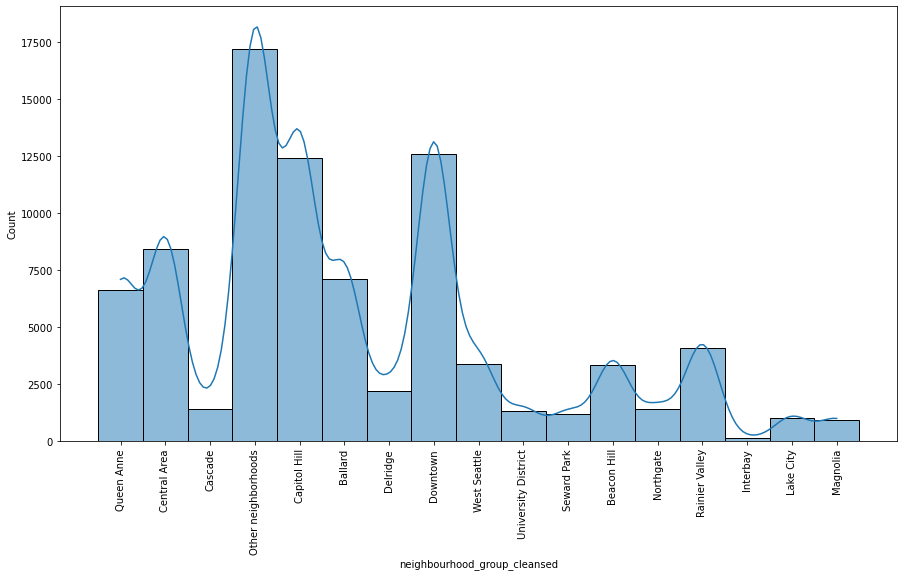

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.histplot(df.neighbourhood_group_cleansed,kde=True)
plt.xticks(rotation=90);


## From the plot it apears that **Capitol hill** and **Downtown** has the greatest nuber of visits, So we are going to investigate the reason, so first we check the average price per month

In [152]:
neighbourhoods = df['neighbourhood_group_cleansed'].unique()
df3 = df[['price','neighbourhood_group_cleansed','month']]


In [153]:
df3 = df3.groupby(['month','neighbourhood_group_cleansed'])['price'].mean().reset_index()
df3

,month,neighbourhood_group_cleansed,price
0,1,Ballard,102.347458
1,1,Beacon Hill,88.798077
2,1,Capitol Hill,111.033010
3,1,Cascade,126.897436
4,1,Central Area,94.651852
...,...,...,...
196,12,Queen Anne,122.887872
197,12,Rainier Valley,82.392308
198,12,Seward Park,75.347222
199,12,University District,73.716814


Text(0.5, 1.0, 'price for neighbourhoodper month')

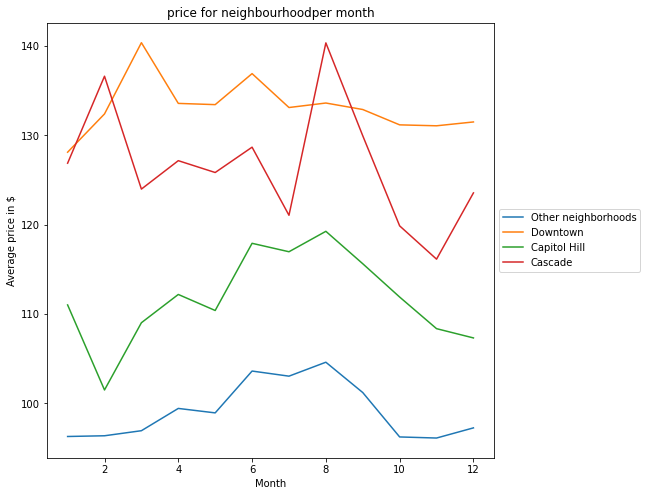

In [173]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
nh = ['Other neighborhoods','Downtown','Capitol Hill',"Cascade"]
for neighbourhood in nh:
    ax.plot(df3[df3['neighbourhood_group_cleansed']== neighbourhood]['month'],
    df3[df3['neighbourhood_group_cleansed']== neighbourhood]['price'],label = neighbourhood)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, .5))

plt.ylabel('Average price in $')
plt.xlabel('Month')
plt.title('price for neighbourhoodper month')

> ## shows up at the end of analysis that the mostly visited neighbourhoods (DownTown, Capitol Hill and the other remaining neighbourhoods) has small price average per years compared to neighbourhoods that have less visits like Cascade


## 2. What is the most expenive time to  rent in seatle?

In [155]:
m = df.groupby(['month'])["price"].mean().reset_index()
m


,month,price
0,1,106.931636
1,2,105.183125
2,3,108.286436
3,4,108.189464
4,5,106.424325
5,6,110.713132
6,7,111.349424
7,8,111.624059
8,9,109.144986
9,10,106.832719


<AxesSubplot:xlabel='month', ylabel='price'>

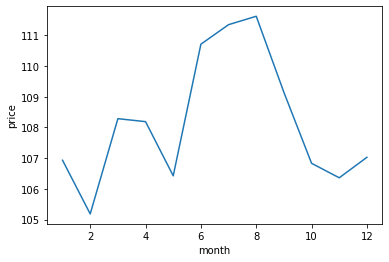

In [156]:
sns.lineplot(x=m.month,y=m.price)


> ## It appears that from june to augast is th most expensive time

## 3. What is the property type with the greatest cost?

C:\Users\Donia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


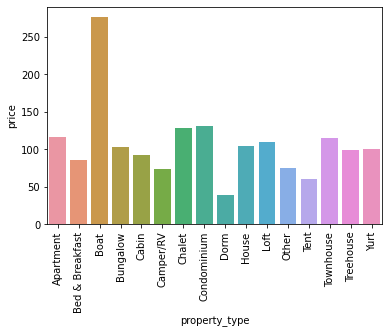

In [165]:
property_df = df[['property_type','price']]

property_df = property_df.groupby(['property_type'])["price"].mean().reset_index()


sns.barplot(property_df['property_type'], property_df['price'])
plt.xticks(rotation=90);


# Machine Model:

    try linear regression as we are predicting continous variable(price) 

In [118]:
df2 = df[['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price']]
df2 = pd.get_dummies(df2, columns=['property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type'])
df2_cols = list(df2.select_dtypes(include=['object']).columns)
for col in  df2_cols:
    df2 = pd.concat([df2.drop(col, axis=1), pd.get_dummies(df2[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)

df2

,price,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,...,beds_7.0,beds_8.0,beds_9.0,beds_10.0,beds_15.0,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,75.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,75.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,75.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,75.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,75.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84844,175.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84845,175.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84846,175.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84847,175.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
y = df2.price
x = df2.drop(["price"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = 100)
reg = LinearRegression().fit(X_train, y_train)

In [176]:
predicted_test = reg.predict(X_test)
predicted_train = reg.predict(X_train)


print(r2_score(y_train, predicted_train))
print(r2_score(y_test, predicted_test))

0.5928643700836507
0.5418530688417371


In [122]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, 
                               criterion='mse', 
                               random_state=42, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_preds = forest.predict(X_train)
y_test_preds = forest.predict(X_test)

print(r2_score(y_train, y_train_preds))
print(r2_score(y_test, y_test_preds))

0.7137040372495123
0.6637988561673696
